In [ ]:
import numpy as np

#**Imported csv file**

In [ ]:
import pandas as pd
path='/content/drive/MyDrive/Temp/Salary_dataset.csv'
df=pd.read_csv(path)
X=np.array(df['YearsExperience'])
Y=np.array(df['Salary'])

#**Data visualization**

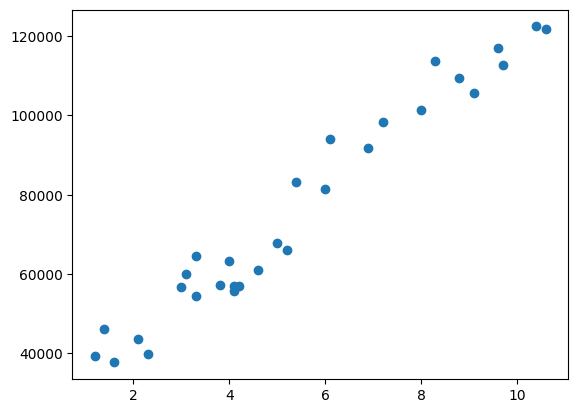

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X,Y)

#**Preparing data for training**

In [ ]:
data=[]
for i in range(len(X)):
  list=[]
  list.append(X[i]);list.append(Y[i])
  data.append(list)

#**Simple Linear Regression**

**Using Gredient descent**

In [ ]:
thetas=[]
m=0;c=0
n=100000;a=0.0003
for i in range(n):
  gred_c=0;gred_m=0
  for rec in data:
    x=rec[0];y=rec[1]
    pred=m*x+c
    e=y-pred
    gred_c+=e
    gred_m+=(e*x)
  c=c-a*(-1*gred_c)
  m=m-a*(-1*gred_m)
  temp=[]
  temp.append(m);temp.append(c)
  thetas.append(temp)

print(m,c)

9449.96232145523 24848.203966522153


**Predicted Line**

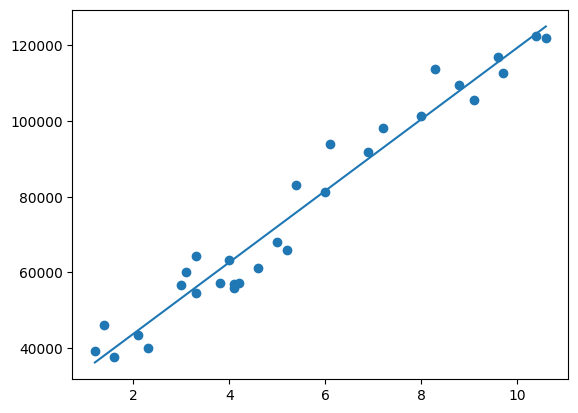

In [ ]:
plt.scatter(X,Y)
pred=m*(X)+c
plt.plot(X,pred)
plt.show()

**Trajectory of line**

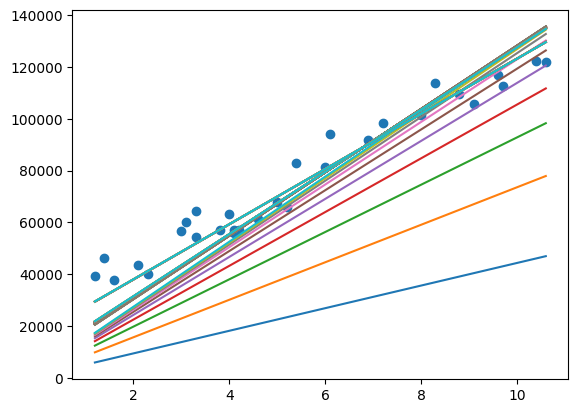

In [ ]:
plt.scatter(X,Y)
for i in thetas[0:10]+thetas[100:150]+thetas[550:560]:
  plt.plot(X,i[0]*X+i[1])


**Using sklearn**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X.reshape(-1,1),Y.reshape(-1,1),test_size=0.30)

In [ ]:
model.fit(X_train,Y_train)
pred2=model.predict(X_test)
sc=model.score(X_test,Y_test)
print(model.coef_,model.intercept_,sc)

[[9823.89324476]] [22084.6758866] 0.9069573337360759


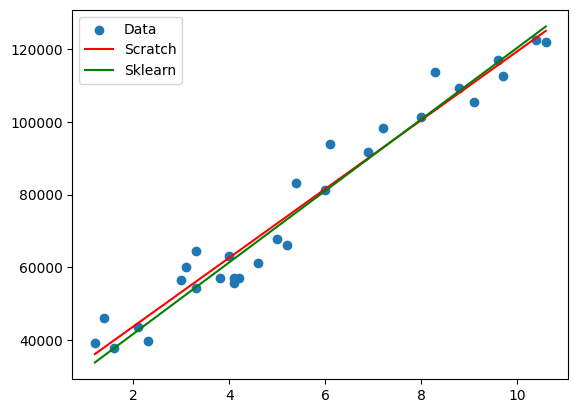

In [ ]:
plt.scatter(X,Y)
plt.plot(X,pred,color='red')

pred3=model.predict(X.reshape(-1,1)).flatten()
plt.plot(X,pred3,color='green')

plt.legend(['Data','Scratch','Sklearn'])
plt.show()

**Using Normal Equation**

In [ ]:
def Normal_Eqn(X,Y):
  m1=(X.T).dot(X);m2=(X.T).dot(Y)

  m1=np.linalg.pinv(m1)
  return m1.dot(m2)


In [ ]:
New_X=[]
for i in X_train:
  temp=[]
  temp.append(i[0]);temp.append(1)
  New_X.append(temp)

New_X
thetas=Normal_Eqn(np.array(New_X),Y_train.reshape(-1,1))

In [ ]:
thetas

array([[ 9823.89324476],
       [22084.6758866 ]])

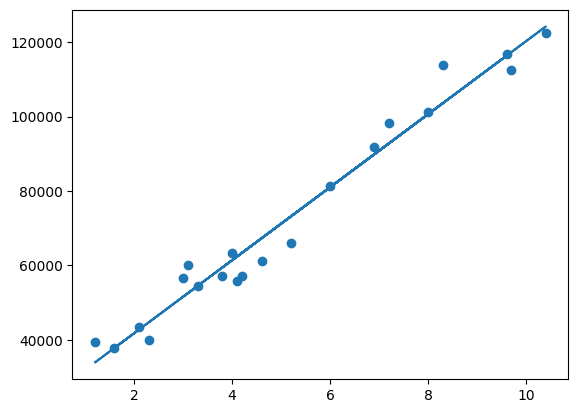

In [ ]:
pred_by_N_Eqn=np.array(New_X).dot(thetas)
plt.scatter(X_train,Y_train)
plt.plot(X_train,pred_by_N_Eqn)

#**Multiple Regression**

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Temp/SLtest2.csv')

In [ ]:
# X=df2['YearsExperience']
# Y=df2['age']
# df2.columns
# numpy.concatenate
len(df2)

20

In [ ]:
X2=np.ones(len(df2)).reshape(-1,1)

for col in df2.columns[0:len(df2.columns)-1]:
  temp=np.array(df2[col]).reshape(-1,1)
  X2=np.hstack((X2,temp))
str=df2.columns[-1]
Y2=np.array(df2[str]).reshape(-1,1)
Y2=Y2/1000      # Normalization step

**Using Normal equation**

In [ ]:
thetas2=Normal_Eqn(X2,Y2)
thetas2

array([[31.26168985],
       [-0.09919536],
       [ 2.16240419]])

**using Gredient Descent**

In [ ]:
thetas2=np.zeros(len(X2[0])).reshape(-1,1)
n=100000
alpha=0.00005
for i in range(n):
  pred=X2.dot(thetas2)
  e=pred-Y2
  gred=(X2.T).dot(e)
  thetas2=thetas2-alpha*gred

thetas2


array([[31.10239537],
       [-0.09488469],
       [ 2.15917295]])

In [ ]:
a=np.array([[1],[2]])
b=np.array([[1],[1]])
print(2*a)

[[2]
 [4]]


In [ ]:
((X2[0].reshape(-1,1)).T).dot(thetas2)

array([[30.88945117]])

In [ ]:
Y2[0]

array([30.45])

In [ ]:
print((X2.dot(thetas2)-Y2)*100/Y2)

[[ 1.4431894 ]
 [-2.62580977]
 [-1.9595914 ]
 [-3.15985499]
 [ 1.63931302]
 [-0.60656482]
 [-5.07622415]
 [-2.76788167]
 [-4.6272627 ]
 [-1.05143687]
 [ 9.59020269]
 [-0.07509928]
 [ 0.14838535]
 [ 0.28726495]
 [ 2.99716305]
 [ 3.25748322]
 [-2.03612608]
 [ 0.67774715]
 [ 4.9106716 ]
 [ 0.99259042]]
